In [34]:
import numpy as np
import pandas as pd

ckbk_meta_file = "../data/amzn/meta_Cookbooks.json"
ckbk_reviews_file = "../data/amzn/Cookbooks.json"

# --- Parser for reading in the Amazon json files (can be used for both reviews and metadata)
def parse(path):
    g = open(path, 'r')
    for l in g:
        yield json.loads(l)
        

ckbks = pd.read_json(ckbk_meta_file, lines=True)
ckbks

,category,description,title,also_buy,brand,rank,also_view,main_cat,price,asin,image,feature,date,similar_item,details
0,"[Books, Cookbooks, Food & Wine, Regional & Int...",[Though at first glance too luscious for the p...,France: The Beautiful Cookbook- Authentic Reci...,"[0002551543, 0002154463, 0002553708, 000255032...",Gilles Pudlowski,"703,920inBooks(","[0002551543, B011WA3PO4, 0002550326, 000255029...",Books,$14.29,0002154129,NaN,NaN,NaT,NaN,NaN
1,"[Books, Cookbooks, Food & Wine, Regional & Int...",[Lorenza de Medici has published more than 30 ...,"Italy, The Beautiful Cookbook: Authentic Recip...","[0002553708, 0002154129, 0002550326, 000255154...",Patrizia Passigli,"143,239inBooks(","[0681152672, 0002553708, 0002550326, 000215412...",Books,$79.90,0002154463,NaN,NaN,NaT,NaN,NaN
2,"[Books, Cookbooks, Food & Wine, Regional & Int...",[Two collections of California's best. The lat...,"California, The Beautiful Cookbook: Authentic ...","[0002553481, 0002551519, 000215854X, 000255370...",Virginia Rainey,"767,416inBooks(","[0002551519, 0002550326, 0002553481, 000255154...",Books,$12.95,0002159317,NaN,NaN,NaT,NaN,NaN
3,"[Books, Cookbooks, Food & Wine, Regional & Int...",[Fifth in the series that includes the best-se...,America: The Beautiful Cookbook,"[0002251965, 0002553708, 0002553481, 000215931...",Phillip S. Schulz,"896,298inBooks(","[0002550326, 0002250357, 0002553708, 000215949...",Books,$13.34,000215854X,NaN,NaN,NaT,NaN,NaN
4,"[Books, Cookbooks, Food & Wine, Regional & Int...",[The latest addition to this popular series is...,Mexico The Beautiful Cookbook: Authentic Recip...,"[0002553708, 0002553481, 0002154463, 000255029...",Susanna Palazuelos,"235,258inBooks(","[0067575862, 0061689513, 0002553481, 071486752...",Books,NaN,000215949X,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44831,"[Books, Cookbooks, Food & Wine, Special Diet]",[Recipe Excerpts from The Joy Fit Club Ch...,"Joy Fit Club: Cookbook, Diet Plan & Inspiration","[1609613120, 1401950396, 140195037X, 140195567...",Visit Amazon's Joy Bauer Page,"72,498inBooks(","[1401955673, 1401950396, 1609613120, 031233602...",Books,$21.99,B01FMW2MZ6,NaN,NaN,NaT,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n\n<ul>\..."
44832,"[Books, Cookbooks, Food & Wine, Beverages & Wine]","[""A fascinating look at the place and function...",Drinking in America: Our Secret History,"[0743405919, 0822348713, 0226121275, 162040252...",Visit Amazon's Susan Cheever Page,"542,949inBooks(","[0029185300, 0743405919, 0226121275, 019502990...",Books,$9.73,B01FMVXYF4,NaN,NaN,NaT,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n\n<ul>\..."
44833,"[Books, Cookbooks, Food & Wine]",[ALL NEW 5th Edition to kick off 2017 with exp...,Entertaining with Vegetables: A Recipe Collect...,NaN,Chadwick Boyd,"2,362,317inBooks(","[0999368117, 0316484156, 0393349322, 054773736...",Books,NaN,B01FUPYP0A,NaN,NaN,NaT,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n\n<ul>\..."
44834,"[Books, Cookbooks, Food & Wine]",[Grit Country Series Magazine 2016 (Volume 10...,Grit Guide to Cast Iron Cooking Magazine 2016,NaN,NaN,"3,684,920inBooks(",NaN,Books,NaN,B01FV1VJ66,NaN,NaN,NaT,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n\n<ul>\..."


In [35]:
ckbks["desc"] = ckbks["description"].apply(lambda x: " ".join(str(x).split()))
ckbks["desc_count"] = ckbks["description"].apply(lambda x: len(" ".join(x).split()))
#ckbks["rank_no"] = ckbks["rank"].apply(lambda x: int(str(x[:-8]).replace(",", "")))
ckbks[ckbks["desc_count"] >= 20].describe()

,desc_count
count,27571.000000
mean,204.249864
std,269.020570
min,20.000000
25%,66.000000
50%,134.000000
75%,264.000000
max,10260.000000


In [36]:
# --- Explore max count
ckbks.iloc[ckbks["desc_count"].argmax()]

//anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


category        [Books, Cookbooks, Food & Wine, Cooking by Ing...
description     [Dr. Bernard Jensen was one of Americas pionee...
title           Foods That Heal: A Guide to Understanding and ...
also_buy        [0658002759, 0895295849, 0658002791, 065800278...
brand                                          Dr. Bernard Jensen
rank                                              286,486inBooks(
also_view       [0895295849, 0658002759, 1401948324, 065800279...
main_cat                                                    Books
price                                                      $13.77
asin                                                   0895295636
image                                                         NaN
feature                                                       NaN
date                                                          NaT
similar_item                                                  NaN
details                                                       NaN
desc      

In [51]:
from bs4 import BeautifulSoup
text = ckbks.iloc[5537]["description"][0]
print(text)
soup = BeautifulSoup(text)
text_nohtml = soup.get_text()
text_nohtml

&lt;!-- /* Font Definitions */ @font-face {font-family:"Cambria Math"; panose-1:2 4 5 3 5 4 6 3 2 4; mso-font-charset:0; mso-generic-font-family:auto; mso-font-pitch:variable; mso-font-signature:-536870145 1107305727 0 0 415 0;} @font-face {font-family:Calibri; panose-1:2 15 5 2 2 2 4 3 2 4; mso-font-charset:0; mso-generic-font-family:auto; mso-font-pitch:variable; mso-font-signature:-520092929 1073786111 9 0 415 0;} /* Style Definitions */ p.MsoNormal, li.MsoNormal, div.MsoNormal {mso-style-unhide:no; mso-style-qformat:yes; mso-style-parent:""; margin-top:0in; margin-right:0in; margin-bottom:10.0pt; margin-left:0in; line-height:115%; mso-pagination:widow-orphan; font-size:11.0pt; font-family:Calibri; mso-ascii-font-family:Calibri; mso-ascii-theme-font:minor-latin; mso-fareast-font-family:Calibri; mso-fareast-theme-font:minor-latin; mso-hansi-font-family:Calibri; mso-hansi-theme-font:minor-latin; mso-bidi-font-family:"Times New Roman"; mso-bidi-theme-font:minor-bidi; mso-ansi-language:

'<!-- /* Font Definitions */ @font-face {font-family:"Cambria Math"; panose-1:2 4 5 3 5 4 6 3 2 4; mso-font-charset:0; mso-generic-font-family:auto; mso-font-pitch:variable; mso-font-signature:-536870145 1107305727 0 0 415 0;} @font-face {font-family:Calibri; panose-1:2 15 5 2 2 2 4 3 2 4; mso-font-charset:0; mso-generic-font-family:auto; mso-font-pitch:variable; mso-font-signature:-520092929 1073786111 9 0 415 0;} /* Style Definitions */ p.MsoNormal, li.MsoNormal, div.MsoNormal {mso-style-unhide:no; mso-style-qformat:yes; mso-style-parent:""; margin-top:0in; margin-right:0in; margin-bottom:10.0pt; margin-left:0in; line-height:115%; mso-pagination:widow-orphan; font-size:11.0pt; font-family:Calibri; mso-ascii-font-family:Calibri; mso-ascii-theme-font:minor-latin; mso-fareast-font-family:Calibri; mso-fareast-theme-font:minor-latin; mso-hansi-font-family:Calibri; mso-hansi-theme-font:minor-latin; mso-bidi-font-family:"Times New Roman"; mso-bidi-theme-font:minor-bidi; mso-ansi-language:EN

In [37]:
x=44575
ckbks.iloc[x-1]
#ckbks.iloc[x-1]["desc_len"]

category                          [Books, Cookbooks, Food & Wine]
description     [-                     ,         --     -     ...
title                                         Ranna Khaddo Pushti
also_buy                                                      NaN
brand                                     Professor Siddiqa Kabir
rank                                            5,629,668inBooks(
also_view                                            [B0006F0POA]
main_cat                                                    Books
price                                                         NaN
asin                                                   B0083GTNG0
image                                                         NaN
feature                                                       NaN
date                                                          NaT
similar_item                                                  NaN
details         \n  <div class="content">\n\n\n\n\n\n\n\n<ul>\...
desc      

In [38]:
# --- Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

data = ckbks[ckbks["desc_count"] >= 20][["asin", "title", "desc"]].copy()

alphanumeric = lambda x: re.sub('[\d]+', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['desc_new'] = data.desc.map(punc_lower)
data['desc_new'] = data.desc_new.map(alphanumeric)
print(f"The size of the processed data: {data.shape}")
data.head()

The size of the processed data: (27571, 4)


,asin,title,desc,desc_new
0,0002154129,France: The Beautiful Cookbook- Authentic Reci...,"[""Though at first glance too luscious for the ...",though at first glance too luscious for the ...
1,0002154463,"Italy, The Beautiful Cookbook: Authentic Recip...",['Lorenza de Medici has published more than 30...,lorenza de medici has published more than ...
2,0002159317,"California, The Beautiful Cookbook: Authentic ...",['Two collections of California\'s best. The l...,two collections of california s best the l...
3,000215854X,America: The Beautiful Cookbook,['Fifth in the series that includes the best-s...,fifth in the series that includes the best s...
4,000215949X,Mexico The Beautiful Cookbook: Authentic Recip...,"[""The latest addition to this popular series i...",the latest addition to this popular series i...


In [7]:
data["greek"] = data["desc_new"].str.find("σ")
data[data["greek"]>0]

,asin,title,desc,desc_new,greek
43192,9604931253,edesmatologion christougennon ton alismoniton ...,"[""OTAN AKOYΣ AΠO ΠAIΔI ΓIA HΣ AΛHΣMONHTEΣ ΠATP...",otan akoyς aπo πaiδi γia hς aλhσmonhteς πatp...,33


In [8]:
data.drop(index=43192, inplace=True)
data[data["greek"]>0]

,asin,title,desc,desc_new,greek


In [9]:
data.shape

(27570, 5)

### PCA Using Description

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, _, _ = train_test_split(data['desc_new'], data['asin'], test_size=0.3, random_state=42)
cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

xtrain = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
xtest = pd.DataFrame(X_test_cv1.toarray(), columns=cv1.get_feature_names())

In [11]:
print(f"Train doc-term mat shape: {xtrain.shape}\nTest doc-term mat shape: {xtest.shape}")

Train doc-term mat shape: (19299, 88475)
Test doc-term mat shape: (8271, 88475)


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
xtrain_pcs = pca.fit_transform(xtrain)

In [23]:
from joblib import dump, load
dump(xtrain_pcs, "../model/ver1_trainPCA2.joblib")
dump(pca, "../model/ver1_PCAobj.joblib")

['../model/ver1_PCAobj.joblib']

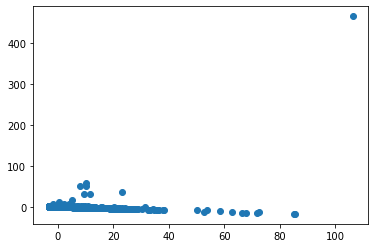

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.ylim(-20, 50)
#plt.xlim(0, 15)
plt.scatter(xtrain_pcs[:,0], xtrain_pcs[:,1])
xmax = np.max(xtrain_pcs[:,0])
ymax = np.max(xtrain_pcs[:,1])
#print(X_train.iloc[xtrain_pcs[:,0].argmax()])
#print(xtrain_pcs.shape)